In [588]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imread
from scipy.io import loadmat
from scipy.ndimage import convolve
import pdb
import scipy
import math
import cv2

# Part A- Image Responses with Filters

In [589]:
filters=loadmat('filters.mat')['F']

In [590]:
cardinal1=Image.open('cardinal1.jpg').resize((100,100)).convert("L")
cardinal2=Image.open('cardinal2.jpg').resize((100,100)).convert("L")
leopard1=Image.open('leopard1.jpg').resize((100,100)).convert("L")
leopard2=Image.open('leopard2.jpg').resize((100,100)).convert("L")
panda1=Image.open('panda1.jpg').resize((100,100)).convert("L")
panda2=Image.open('panda2.jpg').resize((100,100)).convert("L")

In [591]:
imgs=[cardinal1, cardinal2, leopard1, leopard2, panda1, panda2]

In [592]:
c1_convs=np.array([ convolve(cardinal1, filters[:,:,i]) for i in range(filters.shape[2])])
c2_convs=np.array([ convolve(cardinal2, filters[:,:,i]) for i in range(filters.shape[2])])
l1_convs=np.array([ convolve(leopard1, filters[:,:,i]) for i in range(filters.shape[2])])
l2_convs=np.array([ convolve(leopard2, filters[:,:,i]) for i in range(filters.shape[2])])
p1_convs=np.array([ convolve(panda1, filters[:,:,i]) for i in range(filters.shape[2])])
p2_convs=np.array([ convolve(panda2, filters[:,:,i]) for i in range(filters.shape[2])])


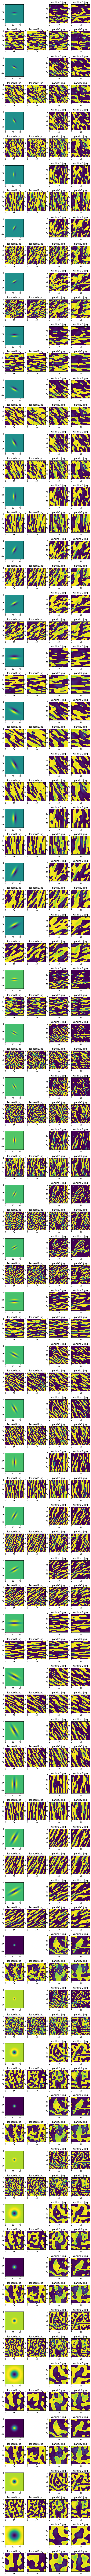

In [593]:
fig, axs = plt.subplots(2*48, 4, figsize=(8,250))
for i in range (filters.shape[2]):
    axs[i*2][0].imshow(filters[:,:,i])
    axs[i*2,1].axis('off')
    axs[i*2][2].imshow(c1_convs[i])
    axs[i*2][2].set_title('cardinal1.jpg')
    axs[i*2][3].imshow(c2_convs[i])
    axs[i*2][3].set_title('cardinal2.jpg')
    axs[i*2+1][0].imshow(l1_convs[i])
    axs[i*2+1][0].set_title('leopard1.jpg')
    axs[i*2+1][1].imshow(l2_convs[i])
    axs[i*2+1][1].set_title('leopard2.jpg')
    axs[i*2+1][2].imshow(p1_convs[i])
    axs[i*2+1][2].set_title('panda1.jpg')
    axs[i*2+1][3].imshow(p2_convs[i])
    axs[i*2+1][3].set_title('panda2.jpg')

# Part B- Image Description with Textures

In [594]:
def computeTextureReprs(image, F):
    """image: pil image
    F: nxwxh filters"""
#     responses=np.zeros((F.shape[2], image.height, image.width))
    grey=image.resize((100,100)).convert("L")
    responses = np.array([ convolve(grey, F[:,:,i]) for i in range(F.shape[2])])
    texture_repr_concat=responses.flatten()
    texture_repr_mean=np.mean(responses, axis=(1,2))
    return texture_repr_concat, texture_repr_mean

In [595]:
trc, trm=computeTextureReprs(Image.open('cardinal1.jpg'), filters[:,:,:])

In [596]:
trc

array([  1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   2,   2,   2,
         1,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 25

# Part C- Hybrid Images

In [597]:
im1=Image.open('woman_happy.png').resize((512,512)).convert("L")
im2=Image.open('woman_neutral.png').resize((512,512)).convert("L")

In [598]:
im1_blur=Image.fromarray(scipy.ndimage.gaussian_filter(im1, 6))
im2_blur=Image.fromarray(scipy.ndimage.gaussian_filter(im2, 6))
im1_blur.save('im1_blur.png')
im2_blur.save('im2_blur.png')

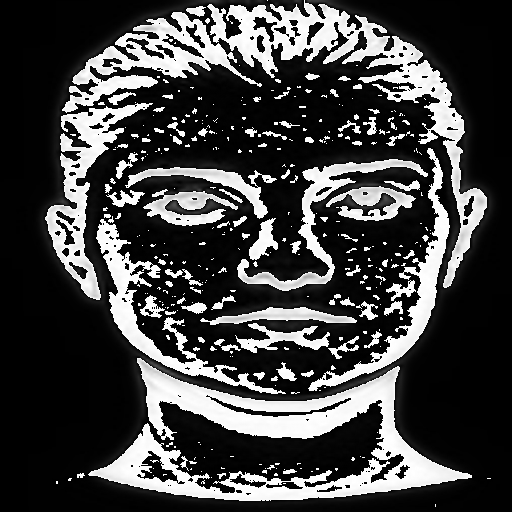

In [599]:
im1_detail=Image.fromarray(np.array(im1) - np.array(im1_blur))
im2_detail=Image.fromarray(np.array(im2) - np.array(im2_blur))
im2_detail.save('im2_detail.png')
im2_detail

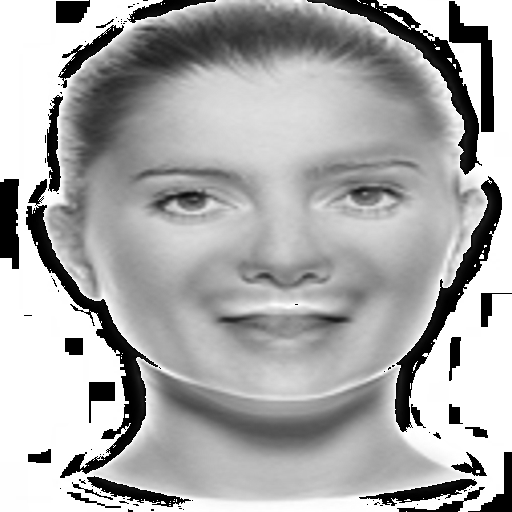

In [600]:
hybrid=Image.fromarray(np.array(im1_blur)+np.array(im2_detail))
hybrid.save('hybrid.png')
hybrid

# Part D- Feature Detection

In [601]:
def vert_grad(mat, r, c):
    if r == 0:
        return (mat[0][c]-mat[1][c])**2
    elif r == mat.shape[0]-1:
        return (mat[r-1][c]-mat[r][c])**2
    else:
#         print("test")
#         print("r:", r)
#         print("c:", c)
#         print("r-1", r-1)
#         print("r+1", r+1)
#         print("mat[r-1][c]", mat[r-1][c])
#         print("mat[r+1][c]", mat[r+1][c])
#         print("mat[r-1][c] - mat[r+1][c]", mat[r-1][c] - mat[r+1][c])
        return (mat[r-1][c]-mat[r+1][c])**2
def hor_grad(mat, r, c):
    if c == 0:
        return (mat[r][0]-mat[r][1])**2
    elif c == mat.shape[1]-1:
        return (mat[r][c-1]-mat[r][c])**2
    else:
        return (mat[r][c-1]-mat[r][c+1])**2
def extract_keypoints(image, k=0.05, perc=1):
    """image:color image"""
    grey=image.convert("L")
    window_size=3
    
    x=None
    y=None
    scores=None
    Ix=None
    Iy=None
    
    
    image_arr=np.array(grey)
    
#     #Get horizontal gradient
#     Ix=np.zeros(image_arr.shape)
#     for r in range(image_arr.shape[0]):
#         for c in range(image_arr.shape[1]):
#             Ix[r][c]=hor_grad(image_arr, r, c)
    
#     #Get vertical gradient
#     Iy=np.zeros(image_arr.shape)
#     for r in range(image_arr.shape[0]):
#         for c in range(image_arr.shape[1]):
# #             print(r,c)
#             Iy[r][c]=vert_grad(image_arr, r, c)

#     https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html
    
    Ix = cv2.Sobel(image_arr,cv2.CV_64F,1,0,ksize=5)
    Iy = cv2.Sobel(image_arr,cv2.CV_64F,0,1,ksize=5)
    

    R=np.zeros(image_arr.shape)
    
    for r in range(2, image_arr.shape[0]-2):
        for c in range(2, image_arr.shape[1]-2):
            M=np.zeros((2,2))
            for y in range(-(window_size//2),window_size//2+1):
                for x in range(-(window_size//2),window_size//2+1):
                    M += np.array([[(Ix[r+y][c+x])**2, Ix[r+y][c+x]*Iy[r+y][c+x]],[Ix[r+y][c+x]*Iy[r+y][c+x], (Iy[r+y][c+x])**2]])
            R[r][c]=np.linalg.det(M)-k*(np.trace(M)**2)
    
    top_n_percent=np.percentile(R,100-perc)
    
    x=[]
    y=[]
    scores=[]
    for r in range(2, image_arr.shape[0]-2):
        for c in range(2, image_arr.shape[1]-2):
            if R[r][c] > top_n_percent:
                x.append(c)
                y.append(r)
                scores.append(R[r][c])
#     print("top {} percent: ".format(perc), top_n_percent, " number: ", len(scores))
    
    x_not_suppressed=[]
    y_not_suppressed=[]
    scores_not_suppressed=[]
    for i in range(len(x)):
        if R[y[i]][x[i]] > max(R[y[i]-1][x[i]-1], R[y[i]-1][x[i]], R[y[i]-1][x[i]+1],R[y[i]][x[i]-1], R[y[i]][x[i]+1],R[y[i]+1][x[i]-1], R[y[i]+1][x[i]], R[y[i]+1][x[i]+1]):
            x_not_suppressed.append(x[i])
            y_not_suppressed.append(y[i])
            scores_not_suppressed.append(scores[i])
    
#     print("number not suppressed", len(scores_not_suppressed))
    return x_not_suppressed, y_not_suppressed, scores_not_suppressed, Ix, Iy

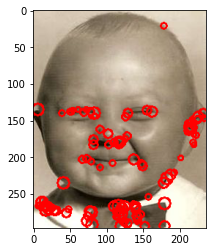

In [602]:
im=Image.open("baby_happy.jpg")
x, y, scores, Ix, Iy=extract_keypoints(im)
cvim=np.array(im)
for i in range(len(x)):
    cvim=cv2.circle(cvim, (int(x[i]), int(y[i])), round(3+stats.percentileofscore(scores, scores[i])/20), (255, 0, 0), 2)
plt.imshow(cvim)

In [603]:
Image.fromarray(cvim).save('vis1.png')

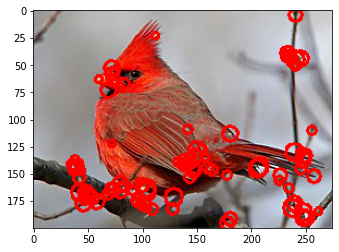

In [604]:
im=Image.open("cardinal1.jpg")
x, y, scores, Ix, Iy=extract_keypoints(im)
cvim=np.array(im)
for i in range(len(x)):
    cvim=cv2.circle(cvim, (int(x[i]), int(y[i])), round(3+stats.percentileofscore(scores, scores[i])/20), (255, 0, 0), 2)
plt.imshow(cvim)

In [605]:
Image.fromarray(cvim).save('vis2.png')

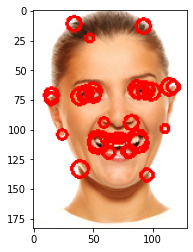

In [606]:
im=Image.open("woman_happy.png")
x, y, scores, Ix, Iy=extract_keypoints(im)
cvim=np.array(im)[:,:,:3]
# plt.imshow(cvim)
for i in range(len(x)):
    cvim=cv2.circle(cvim, (int(x[i]), int(y[i])), round(3+stats.percentileofscore(scores, scores[i])/20), (255, 0, 0), 2)
cvim=cvim.get()
plt.imshow(cvim)

In [607]:
Image.fromarray(cvim).save('vis3.png')

# Part E- Feature Description

In [608]:
def compute_features(x, y, scores, Ix, Iy):
    assert(len(x)==len(y))
    assert(len(y)==len(scores))
    assert(Ix.shape==Iy.shape)
    d=8
    features = np.zeros((len(x),d))
    bins=[]
    for i in range(len(x)):
        if x[i] < 5 or y[i] < 5 or x[i] > Ix.shape[1] - 6 or y[i] > Ix.shape[0] - 6:
            features[i]=np.zeros(8)
        else:
            pixel_bins=np.zeros(8)
            for neighbor_y in range(y[i]-5,y[i]+6):              
                for neighbor_x in range(x[i]-5, x[i]+6):
                    if Ix[neighbor_y][neighbor_x]==0 or Iy[neighbor_y][neighbor_x]==0:
                        continue
                    m=math.sqrt(Ix[neighbor_y][neighbor_x]**2+Iy[neighbor_y][neighbor_x]**2)
                    theta=math.degrees(math.atan(Iy[neighbor_y][neighbor_x]/Ix[neighbor_y][neighbor_x]))
                    theta_bin=(theta+90)//22.5 #1 to 8 from -90 to 90
                    assert(theta_bin >= 0 and theta_bin <=7)
                    pixel_bins[int(theta_bin)] += m

            pixel_bins=pixel_bins/pixel_bins.sum() #normalize
            pixel_bins=np.array([min(b, 0.2) for b in pixel_bins]) #clip
            pixel_bins=pixel_bins/pixel_bins.sum() #normalize
            features[i]=pixel_bins
            
            
                    
    
    
    return features

In [609]:
features=compute_features(x, y, scores, Ix, Iy)
features[:3]

array([[0.02185173, 0.        , 0.01623138, 0.01954537, 0.11014899,
        0.27740751, 0.27740751, 0.27740751],
       [0.26793569, 0.27782193, 0.21158586, 0.08750144, 0.01027605,
        0.07988733, 0.01020135, 0.05479035],
       [0.04768886, 0.02068818, 0.01897678, 0.01701801, 0.00533322,
        0.21035573, 0.3399696 , 0.3399696 ]])

# Part F: Image Description with SIFT Bag-of-Words

In [610]:
def euc_dist(a,b):
    return math.sqrt(sum([(x[0]-x[1])**2 for x in zip(a,b)]))

def computeBOWRepr(features, means):
    bow_repr=np.zeros(means.shape[0])
    
    for feature in features:
        closest_idx = -1
        closest_dist=np.inf
        for i in range(means.shape[0]):
            dist = euc_dist(means[i],feature)
            if dist < closest_dist:
                closest_idx=i
                closest_dist=dist
        bow_repr[closest_idx]+=1
    bow_repr=bow_repr/bow_repr.sum()        
    return bow_repr

In [611]:
computeBOWRepr(features, loadmat('means_k50.mat')['means'])

array([0.        , 0.        , 0.        , 0.16666667, 0.        ,
       0.05555556, 0.        , 0.05555556, 0.05555556, 0.        ,
       0.05555556, 0.05555556, 0.        , 0.        , 0.        ,
       0.        , 0.02777778, 0.        , 0.        , 0.02777778,
       0.11111111, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08333333, 0.        , 0.02777778, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02777778,
       0.08333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02777778,
       0.        , 0.        , 0.        , 0.        , 0.13888889])

In [612]:
means_5=loadmat('means_k5.mat')['means']
means_10=loadmat('means_k10.mat')['means']
means_50=loadmat('means_k50.mat')['means']
means_100=loadmat('means_k100.mat')['means']
means_200=loadmat('means_k200.mat')['means']

# Part G: Comparison of Image Descriptors

With good image representation, average within-class distance should be small compared to between-class difference

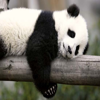

In [613]:
cardinal1=Image.open('cardinal1.jpg').resize((100,100))
cardinal2=Image.open('cardinal2.jpg').resize((100,100))
leopard1=Image.open('leopard1.jpg').resize((100,100))
leopard2=Image.open('leopard2.jpg').resize((100,100))
panda1=Image.open('panda1.jpg').resize((100,100))
panda2=Image.open('panda2.jpg').resize((100,100))
panda2

In [614]:
means_mat=means_50

cardinal1_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal1)), means_mat), computeTextureReprs(cardinal1,filters)[0],computeTextureReprs(cardinal1,filters)[1])
cardinal2_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal2)), means_mat), computeTextureReprs(cardinal2,filters)[0],computeTextureReprs(cardinal2,filters)[1])
leopard1_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard1)), means_mat), computeTextureReprs(leopard1,filters)[0],computeTextureReprs(leopard1,filters)[1])
leopard2_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard2)), means_mat), computeTextureReprs(leopard2,filters)[0],computeTextureReprs(leopard2,filters)[1])
panda1_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda1)), means_mat), computeTextureReprs(panda1,filters)[0],computeTextureReprs(panda1,filters)[1])
panda2_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda2)), means_mat), computeTextureReprs(panda2,filters)[0],computeTextureReprs(panda2,filters)[1])



In [615]:
BOW_within_class=np.mean([euc_dist(cardinal1_repr[0],cardinal2_repr[0]), euc_dist(leopard1_repr[0],leopard2_repr[0]), euc_dist(panda1_repr[0],panda2_repr[0])])
TRC_within_class=np.mean([euc_dist(cardinal1_repr[1],cardinal2_repr[1]), euc_dist(leopard1_repr[1],leopard2_repr[1]), euc_dist(panda1_repr[1],panda2_repr[1])])
TRM_within_class=np.mean([euc_dist(cardinal1_repr[2],cardinal2_repr[2]), euc_dist(leopard1_repr[2],leopard2_repr[2]), euc_dist(panda1_repr[2],panda2_repr[2])])

i=0
BOW_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=1
TRC_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=2
TRM_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])

/Users/maxreynolds/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [616]:
print("BOW ratio: ", BOW_within_class/BOW_betw_classes)
print("TRC ratio: ", TRC_within_class/TRC_betw_classes)
print("TRM ratio: ", TRM_within_class/TRM_betw_classes)

BOW ratio:  1.0295386244039222
TRC ratio:  0.9939253303767042
TRM ratio:  0.63312936038196


### Trying with different k, #keypoints

In [617]:
cardinal1_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal1, 0.06)), means_mat), computeTextureReprs(cardinal1,filters)[0],computeTextureReprs(cardinal1,filters)[1])
cardinal2_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal2, 0.06)), means_mat), computeTextureReprs(cardinal2,filters)[0],computeTextureReprs(cardinal2,filters)[1])
leopard1_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard1, 0.06)), means_mat), computeTextureReprs(leopard1,filters)[0],computeTextureReprs(leopard1,filters)[1])
leopard2_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard2, 0.06)), means_mat), computeTextureReprs(leopard2,filters)[0],computeTextureReprs(leopard2,filters)[1])
panda1_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda1, 0.06)), means_mat), computeTextureReprs(panda1,filters)[0],computeTextureReprs(panda1,filters)[1])
panda2_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda2, 0.06)), means_mat), computeTextureReprs(panda2,filters)[0],computeTextureReprs(panda2,filters)[1])



BOW_within_class=np.mean([euc_dist(cardinal1_repr[0],cardinal2_repr[0]), euc_dist(leopard1_repr[0],leopard2_repr[0]), euc_dist(panda1_repr[0],panda2_repr[0])])
TRC_within_class=np.mean([euc_dist(cardinal1_repr[1],cardinal2_repr[1]), euc_dist(leopard1_repr[1],leopard2_repr[1]), euc_dist(panda1_repr[1],panda2_repr[1])])
TRM_within_class=np.mean([euc_dist(cardinal1_repr[2],cardinal2_repr[2]), euc_dist(leopard1_repr[2],leopard2_repr[2]), euc_dist(panda1_repr[2],panda2_repr[2])])

i=0
BOW_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=1
TRC_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=2
TRM_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])

/Users/maxreynolds/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [618]:
print("BOW ratio: ", BOW_within_class/BOW_betw_classes)
print("TRC ratio: ", TRC_within_class/TRC_betw_classes)
print("TRM ratio: ", TRM_within_class/TRM_betw_classes)

BOW ratio:  1.0281689157321623
TRC ratio:  0.9939253303767042
TRM ratio:  0.63312936038196


In [619]:
cardinal1_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal1, 0.04)), means_mat), computeTextureReprs(cardinal1,filters)[0],computeTextureReprs(cardinal1,filters)[1])
cardinal2_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal2, 0.04)), means_mat), computeTextureReprs(cardinal2,filters)[0],computeTextureReprs(cardinal2,filters)[1])
leopard1_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard1, 0.04)), means_mat), computeTextureReprs(leopard1,filters)[0],computeTextureReprs(leopard1,filters)[1])
leopard2_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard2, 0.04)), means_mat), computeTextureReprs(leopard2,filters)[0],computeTextureReprs(leopard2,filters)[1])
panda1_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda1, 0.04)), means_mat), computeTextureReprs(panda1,filters)[0],computeTextureReprs(panda1,filters)[1])
panda2_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda2, 0.04)), means_mat), computeTextureReprs(panda2,filters)[0],computeTextureReprs(panda2,filters)[1])



BOW_within_class=np.mean([euc_dist(cardinal1_repr[0],cardinal2_repr[0]), euc_dist(leopard1_repr[0],leopard2_repr[0]), euc_dist(panda1_repr[0],panda2_repr[0])])
TRC_within_class=np.mean([euc_dist(cardinal1_repr[1],cardinal2_repr[1]), euc_dist(leopard1_repr[1],leopard2_repr[1]), euc_dist(panda1_repr[1],panda2_repr[1])])
TRM_within_class=np.mean([euc_dist(cardinal1_repr[2],cardinal2_repr[2]), euc_dist(leopard1_repr[2],leopard2_repr[2]), euc_dist(panda1_repr[2],panda2_repr[2])])

i=0
BOW_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=1
TRC_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=2
TRM_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])

/Users/maxreynolds/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [620]:
print("BOW ratio: ", BOW_within_class/BOW_betw_classes)
print("TRC ratio: ", TRC_within_class/TRC_betw_classes)
print("TRM ratio: ", TRM_within_class/TRM_betw_classes)

BOW ratio:  1.0349893698288772
TRC ratio:  0.9939253303767042
TRM ratio:  0.63312936038196


In [621]:
p=2
cardinal1_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal1, perc=p)), means_mat), computeTextureReprs(cardinal1,filters)[0],computeTextureReprs(cardinal1,filters)[1])
cardinal2_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal2, perc=p)), means_mat), computeTextureReprs(cardinal2,filters)[0],computeTextureReprs(cardinal2,filters)[1])
leopard1_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard1, perc=p)), means_mat), computeTextureReprs(leopard1,filters)[0],computeTextureReprs(leopard1,filters)[1])
leopard2_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard2, perc=p)), means_mat), computeTextureReprs(leopard2,filters)[0],computeTextureReprs(leopard2,filters)[1])
panda1_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda1, perc=p)), means_mat), computeTextureReprs(panda1,filters)[0],computeTextureReprs(panda1,filters)[1])
panda2_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda2, perc=p)), means_mat), computeTextureReprs(panda2,filters)[0],computeTextureReprs(panda2,filters)[1])



BOW_within_class=np.mean([euc_dist(cardinal1_repr[0],cardinal2_repr[0]), euc_dist(leopard1_repr[0],leopard2_repr[0]), euc_dist(panda1_repr[0],panda2_repr[0])])
TRC_within_class=np.mean([euc_dist(cardinal1_repr[1],cardinal2_repr[1]), euc_dist(leopard1_repr[1],leopard2_repr[1]), euc_dist(panda1_repr[1],panda2_repr[1])])
TRM_within_class=np.mean([euc_dist(cardinal1_repr[2],cardinal2_repr[2]), euc_dist(leopard1_repr[2],leopard2_repr[2]), euc_dist(panda1_repr[2],panda2_repr[2])])

i=0
BOW_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=1
TRC_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=2
TRM_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
print("with top {}%".format(p))
print("BOW ratio: ", BOW_within_class/BOW_betw_classes)
print("TRC ratio: ", TRC_within_class/TRC_betw_classes)
print("TRM ratio: ", TRM_within_class/TRM_betw_classes)

/Users/maxreynolds/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


with top 2%
BOW ratio:  0.9550657146169009
TRC ratio:  0.9939253303767042
TRM ratio:  0.63312936038196


In [622]:
p=5
cardinal1_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal1, perc=p)), means_mat), computeTextureReprs(cardinal1,filters)[0],computeTextureReprs(cardinal1,filters)[1])
cardinal2_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal2, perc=p)), means_mat), computeTextureReprs(cardinal2,filters)[0],computeTextureReprs(cardinal2,filters)[1])
leopard1_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard1, perc=p)), means_mat), computeTextureReprs(leopard1,filters)[0],computeTextureReprs(leopard1,filters)[1])
leopard2_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard2, perc=p)), means_mat), computeTextureReprs(leopard2,filters)[0],computeTextureReprs(leopard2,filters)[1])
panda1_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda1, perc=p)), means_mat), computeTextureReprs(panda1,filters)[0],computeTextureReprs(panda1,filters)[1])
panda2_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda2, perc=p)), means_mat), computeTextureReprs(panda2,filters)[0],computeTextureReprs(panda2,filters)[1])



BOW_within_class=np.mean([euc_dist(cardinal1_repr[0],cardinal2_repr[0]), euc_dist(leopard1_repr[0],leopard2_repr[0]), euc_dist(panda1_repr[0],panda2_repr[0])])
TRC_within_class=np.mean([euc_dist(cardinal1_repr[1],cardinal2_repr[1]), euc_dist(leopard1_repr[1],leopard2_repr[1]), euc_dist(panda1_repr[1],panda2_repr[1])])
TRM_within_class=np.mean([euc_dist(cardinal1_repr[2],cardinal2_repr[2]), euc_dist(leopard1_repr[2],leopard2_repr[2]), euc_dist(panda1_repr[2],panda2_repr[2])])

i=0
BOW_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=1
TRC_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=2
TRM_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
print("with top {}%".format(p))
print("BOW ratio: ", BOW_within_class/BOW_betw_classes)
print("TRC ratio: ", TRC_within_class/TRC_betw_classes)
print("TRM ratio: ", TRM_within_class/TRM_betw_classes)

/Users/maxreynolds/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


with top 5%
BOW ratio:  0.9421693942204796
TRC ratio:  0.9939253303767042
TRM ratio:  0.63312936038196


In [623]:
p=10
cardinal1_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal1, perc=p)), means_mat), computeTextureReprs(cardinal1,filters)[0],computeTextureReprs(cardinal1,filters)[1])
cardinal2_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal2, perc=p)), means_mat), computeTextureReprs(cardinal2,filters)[0],computeTextureReprs(cardinal2,filters)[1])
leopard1_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard1, perc=p)), means_mat), computeTextureReprs(leopard1,filters)[0],computeTextureReprs(leopard1,filters)[1])
leopard2_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard2, perc=p)), means_mat), computeTextureReprs(leopard2,filters)[0],computeTextureReprs(leopard2,filters)[1])
panda1_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda1, perc=p)), means_mat), computeTextureReprs(panda1,filters)[0],computeTextureReprs(panda1,filters)[1])
panda2_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda2, perc=p)), means_mat), computeTextureReprs(panda2,filters)[0],computeTextureReprs(panda2,filters)[1])



BOW_within_class=np.mean([euc_dist(cardinal1_repr[0],cardinal2_repr[0]), euc_dist(leopard1_repr[0],leopard2_repr[0]), euc_dist(panda1_repr[0],panda2_repr[0])])
TRC_within_class=np.mean([euc_dist(cardinal1_repr[1],cardinal2_repr[1]), euc_dist(leopard1_repr[1],leopard2_repr[1]), euc_dist(panda1_repr[1],panda2_repr[1])])
TRM_within_class=np.mean([euc_dist(cardinal1_repr[2],cardinal2_repr[2]), euc_dist(leopard1_repr[2],leopard2_repr[2]), euc_dist(panda1_repr[2],panda2_repr[2])])

i=0
BOW_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=1
TRC_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=2
TRM_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
print("with top {}%".format(p))
print("BOW ratio: ", BOW_within_class/BOW_betw_classes)
print("TRC ratio: ", TRC_within_class/TRC_betw_classes)
print("TRM ratio: ", TRM_within_class/TRM_betw_classes)

/Users/maxreynolds/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


with top 10%
BOW ratio:  0.8523123711392774
TRC ratio:  0.9939253303767042
TRM ratio:  0.63312936038196


In [624]:
p=25
cardinal1_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal1, perc=p)), means_mat), computeTextureReprs(cardinal1,filters)[0],computeTextureReprs(cardinal1,filters)[1])
cardinal2_repr=(computeBOWRepr(compute_features(*extract_keypoints(cardinal2, perc=p)), means_mat), computeTextureReprs(cardinal2,filters)[0],computeTextureReprs(cardinal2,filters)[1])
leopard1_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard1, perc=p)), means_mat), computeTextureReprs(leopard1,filters)[0],computeTextureReprs(leopard1,filters)[1])
leopard2_repr=(computeBOWRepr(compute_features(*extract_keypoints(leopard2, perc=p)), means_mat), computeTextureReprs(leopard2,filters)[0],computeTextureReprs(leopard2,filters)[1])
panda1_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda1, perc=p)), means_mat), computeTextureReprs(panda1,filters)[0],computeTextureReprs(panda1,filters)[1])
panda2_repr=(computeBOWRepr(compute_features(*extract_keypoints(panda2, perc=p)), means_mat), computeTextureReprs(panda2,filters)[0],computeTextureReprs(panda2,filters)[1])



BOW_within_class=np.mean([euc_dist(cardinal1_repr[0],cardinal2_repr[0]), euc_dist(leopard1_repr[0],leopard2_repr[0]), euc_dist(panda1_repr[0],panda2_repr[0])])
TRC_within_class=np.mean([euc_dist(cardinal1_repr[1],cardinal2_repr[1]), euc_dist(leopard1_repr[1],leopard2_repr[1]), euc_dist(panda1_repr[1],panda2_repr[1])])
TRM_within_class=np.mean([euc_dist(cardinal1_repr[2],cardinal2_repr[2]), euc_dist(leopard1_repr[2],leopard2_repr[2]), euc_dist(panda1_repr[2],panda2_repr[2])])

i=0
BOW_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=1
TRC_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
i=2
TRM_betw_classes=np.mean([
    euc_dist(cardinal1_repr[i], leopard1_repr[i]),
    euc_dist(cardinal1_repr[i], leopard2_repr[i]),
    euc_dist(cardinal1_repr[i], panda1_repr[i]),
    euc_dist(cardinal1_repr[i], panda2_repr[i]),
    euc_dist(cardinal2_repr[i], leopard1_repr[i]),
    euc_dist(cardinal2_repr[i], leopard2_repr[i]),
    euc_dist(cardinal2_repr[i], panda1_repr[i]),
    euc_dist(cardinal2_repr[i], panda2_repr[i]),
    
    euc_dist(leopard1_repr[i], panda1_repr[i]),
    euc_dist(leopard1_repr[i], panda2_repr[i]),
    euc_dist(leopard2_repr[i], panda1_repr[i]),
    euc_dist(leopard2_repr[i], panda2_repr[i]),
])
print("with top {}%".format(p))
print("BOW ratio: ", BOW_within_class/BOW_betw_classes)
print("TRC ratio: ", TRC_within_class/TRC_betw_classes)
print("TRM ratio: ", TRM_within_class/TRM_betw_classes)

/Users/maxreynolds/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


with top 25%
BOW ratio:  0.8400504639413894
TRC ratio:  0.9939253303767042
TRM ratio:  0.63312936038196
